# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime #since date is given as unix timestamp by API

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'?q={city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon'] 
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity'] 
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = datetime.fromtimestamp(city_weather_json['dt']).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        # print("City not found. Skipping...")
        print(city_weather.reason)
        pass

    # pause to avoid rate limiting
    time.sleep(0) #i dont have all day!

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | khor
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | terrace
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | happy valley-goose bay
Processing Record 8 of Set 1 | salinas
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | akureyri
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | kristinestad
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | hondarribia
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | makurdi
Processing Record 23 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,288.05,99,100,1.34,NZ,2024-12-31
1,tiksi,71.6872,128.8694,247.26,100,100,2.68,RU,2024-12-31
2,khor,47.8861,134.9464,247.58,100,77,1.71,RU,2024-12-31
3,college,64.8569,-147.8028,245.98,70,0,0.00,US,2024-12-31
4,terrace,54.5163,-128.6035,273.10,100,100,5.14,CA,2024-12-31


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature


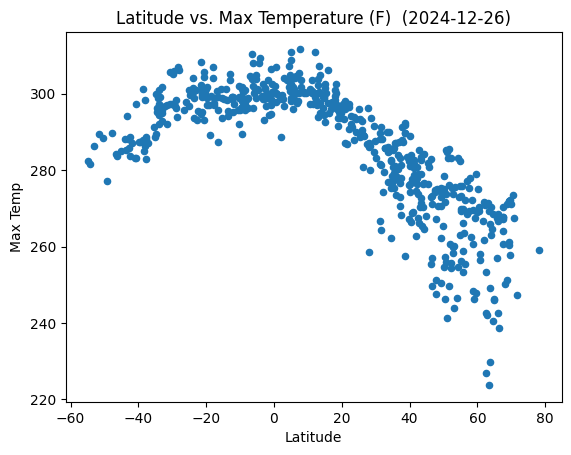

<Figure size 640x480 with 0 Axes>

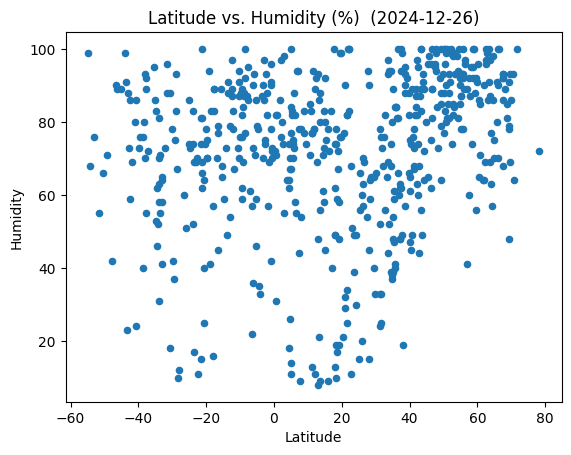

<Figure size 640x480 with 0 Axes>

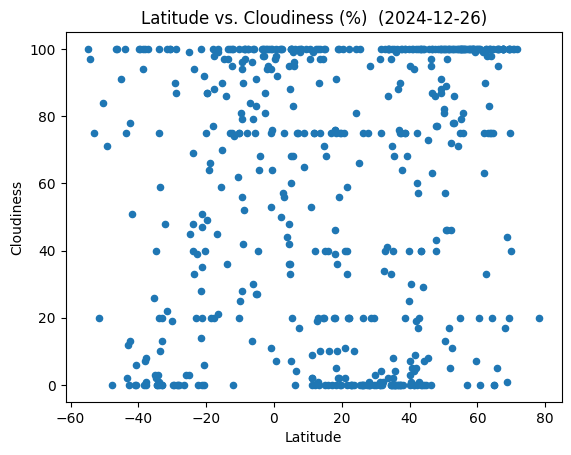

<Figure size 640x480 with 0 Axes>

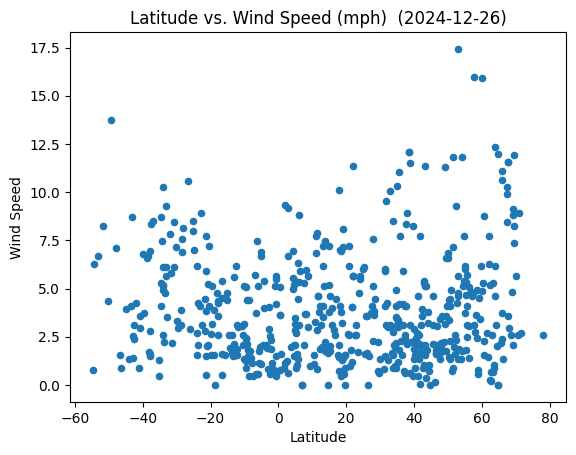

<Figure size 640x480 with 0 Axes>

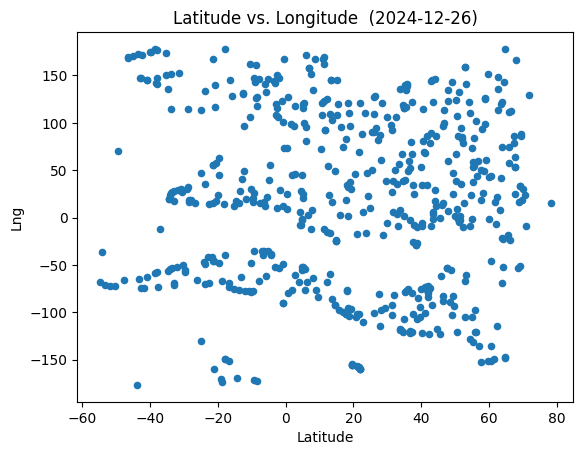

<Figure size 640x480 with 0 Axes>

In [7]:
#Don't repeat yourself!
y_axes=["Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Lng"]
y_labels = {"Max Temp": "Max Temperature (F)", "Humidity": "Humidity (%)", "Cloudiness": "Cloudiness (%)", "Wind Speed": "Wind Speed (mph)", "Lng": "Longitude"}
for i,y in enumerate(y_axes):
    # Build scatter plot for latitude vs. temperature
    city_data_df.plot(kind="scatter", x="Lat", y=y)

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.title(f"Latitude vs. {y_labels[y]}  (2024-12-26)")

    # Save the figure
    plt.savefig(f"output_data/Fig{i+1}.png")
    plt.show()
    plt.clf()
    # Show plot
    # plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [8]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, title, text_coordinates):
    fig, ax = plt.subplots()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.scatter(x_values,y_values)
    ax.plot(x_values,regress_values,"r-")
    ax.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    ax.set_xlabel('Latitude')
    ax.set_ylabel(title)
    ax.set_title(f"{title} vs Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    return fig

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
# northern_hemi_df.head()
# southern_hemi_df.head()

### Latitude Linear Regression Plots


The r-squared is: -0.8551905964504287


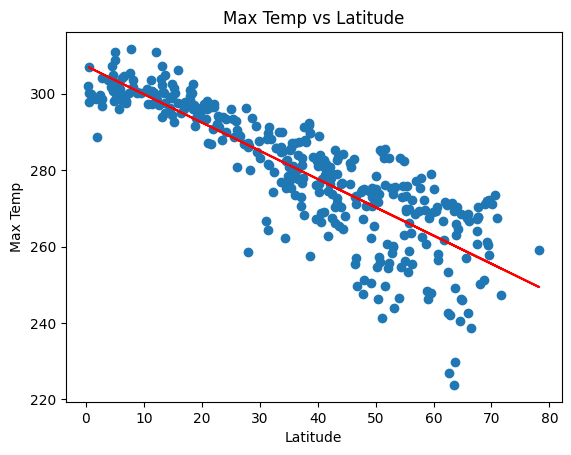

The r-squared is: 0.3798050453970874


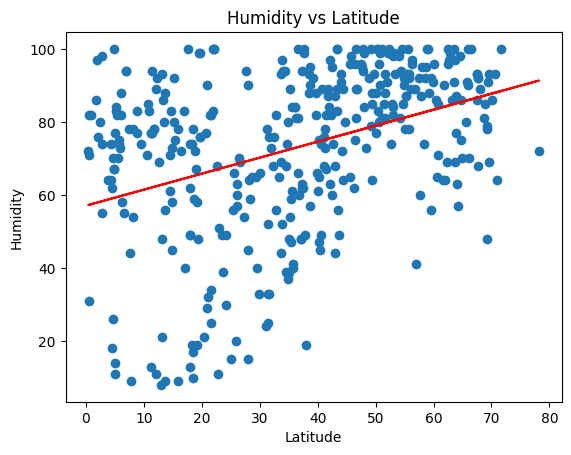

The r-squared is: 0.2079651220682171


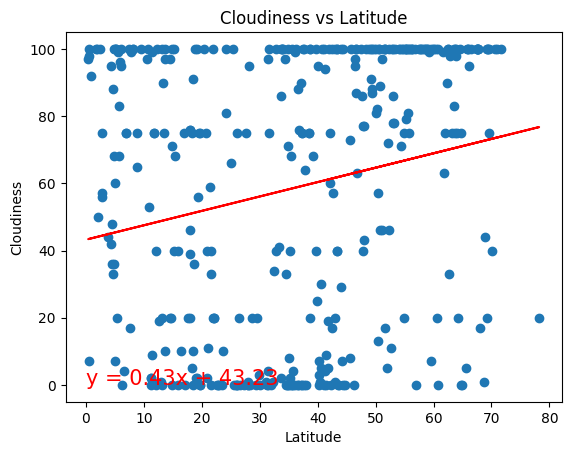

The r-squared is: 0.1462352986094134


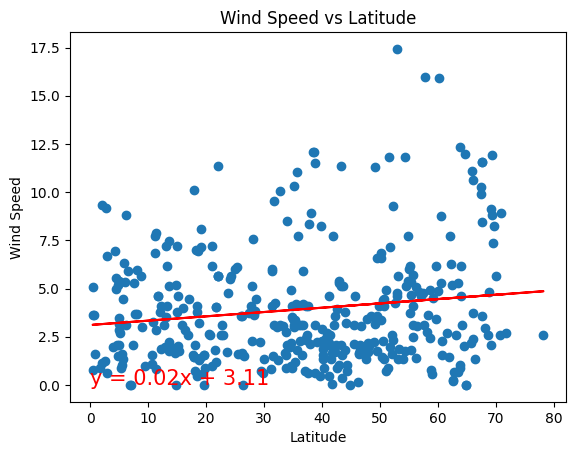

The r-squared is: 0.0014799044006957715


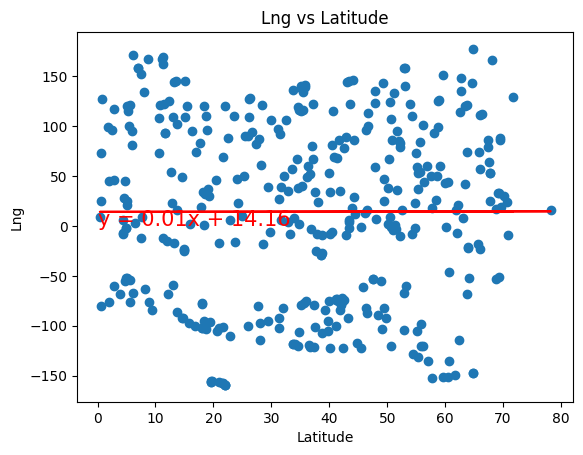

The r-squared is: 0.6323151765608578


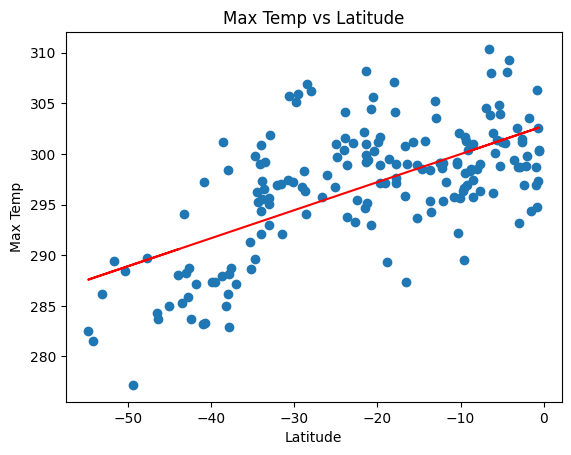

The r-squared is: 0.10997820215139713


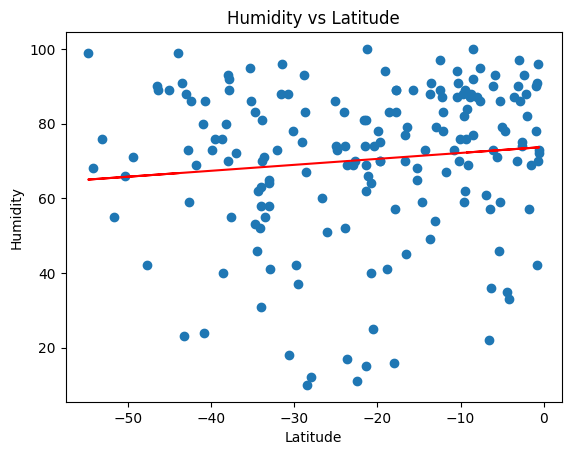

The r-squared is: 0.3332913582242558


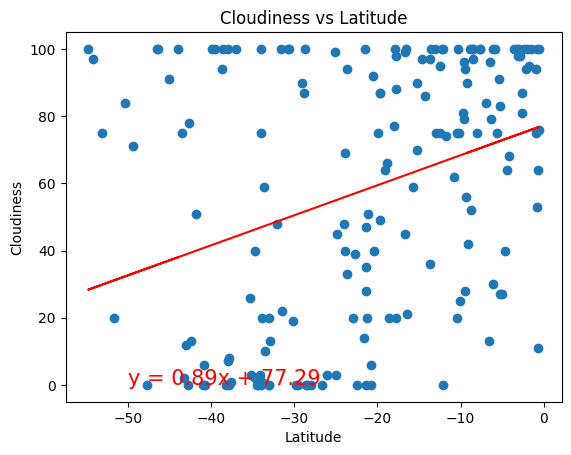

The r-squared is: -0.3592863630078893


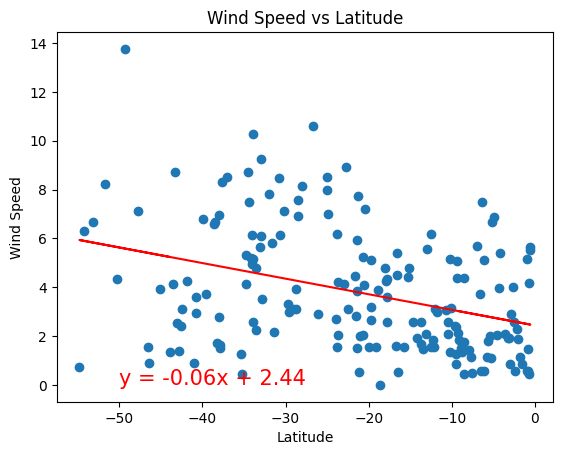

The r-squared is: -0.012773417038612624


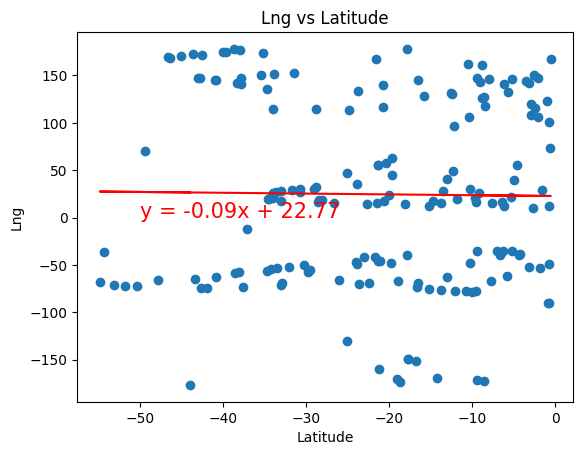

In [10]:
# Linear regression on Northern Hemisphere
for i,y in enumerate(y_axes):
    fig = regression(northern_hemi_df["Lat"], northern_hemi_df[y], y, (0,0))
    fig.savefig(f"output_data/Northern_{y}.png")

# Linear regression on Southern Hemisphere
for i,y in enumerate(y_axes):
    fig = regression(southern_hemi_df["Lat"], southern_hemi_df[y], y, (-50,0))
    fig.savefig(f"output_data/Southern_{y}.png")

**Discussion about the linear relationship:**

The closer one is to the equator, the hotter, more humid, less windy (although this correlation is milder), more cloudy (again, correlation only slight) it is. Note that these correlations manifest in opposite signed slopes of linear regressions for northern versus southern hemispheres. 